# Logistic Regression with Stochastic Gradient Descent

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

---

This notebook illustrates how to implement logistic regression (i.e. the binary classification algorithm) using stochastic gradient descent (SGD). This notebook is similar to the one on [Logstic Regression with Gradient Descent](https://colab.research.google.com/drive/1k9Ybe6GQdthyxjOlNjHcgIWhge5hVcYx), but using SGD instead.

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import seaborn as sns
sns.set_style('white')

## 1. Generate some data


Synthetic data. `y` is generated by flipping a fair coin. `X` is generated from a mixture of Gaussians with fixed cluster centers.


In [ ]:
np.random.seed(42)

In [ ]:
def generate_data(n=100):
    # y generated using fair coin flip
    y = (np.random.rand(n) > 0.5).astype(np.int8)
    
    # x location is cluster center + gaussian noise
    centers = np.array([[1, 5], [5, 1]])
    X = centers[y] + np.random.randn(n,2) * 0.8
    
    return X, y

In [ ]:
X, y = generate_data()

Text(0,0.5,'$x_2$')

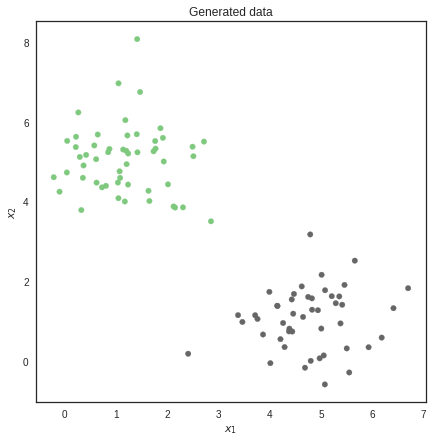

In [ ]:
figure(figsize=(7,7))
scatter(X[:,0], X[:,1], c=y, cmap=cm.Accent, s=30)
title('Generated data')
xlabel('$x_1$')
ylabel('$x_2$')

## 2. Define the model, loss, and gradient

The model is a sigmoid of a linear function:

$$
f(x, w, b) = \frac{1}{1 + e^{-(w^T x + b)}}
$$

We use the cross entropy loss:

$$
L = \frac{1}{N} \sum_{i=1}^{N} y_i \log f(x_i) + (1-y_i) \log (1 - f(x_i))
$$

The gradient of $L$ wrt. $w$ is simply:

$$
\Delta_w L = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i) x_i
$$

And wrt. the bias:

$$
\Delta_b L = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i) 
$$

In [ ]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def predict(X, w, b):
    return sigmoid(np.dot(X, w) + b)

def cross_entropy(y, p):
    return -(y * np.log(p) + (1 - y) * np.log(1.0 - p)).mean()

def loss(X, y, w, b):
    p = predict(X, w, b)
    return cross_entropy(y, p)

def d_loss(X, y, w, b):
    p = predict(X, w, b)
    delta = (p - y)
    dw = (delta[:, np.newaxis] * X).mean(axis=0)
    db = delta.mean()
    return dw, db

## 3. Stochastic gradient descent

The SGD algorithm is just like gradient descent except that instead of calclating the true gradient on the full dataset, we compute a stochastic estimate on a random sample. In the classic SGD algorithm, a sample size of 1 is used. Here we implement *mini-batch* SGD, in which we estimate the gradient on a small batch of examples instead of a single example. This produces more stable estimates than a single sample.

SGD is particularily useful when we have a large amount of training data, since the cost of each update is independent of the number of training examples we have. SGD is one of the most important algorithms in* deep learning*, where we often work with millions of training examples. We'll see more about this later in the module.

In [ ]:
def minibatch_sgd_optimize(X, y, loss, d_loss, lr=1e-3, batch_size=10, epochs=100):
    
    N, D = X.shape
    
    # initialize weights and bias
    w = np.zeros(D) 
    b = 1
    
    # set the initial learning rate
    alpha = lr
    
    # save learning curves to losses
    losses = []

    for i in range(epochs):
        
        # compute full loss
        L = loss(X, y, w, b)
        
        # print loss
        print('Epoch {} Loss: {}'.format(i, L))
        
        for j in range(0,N,batch_size):
            
            x_sample = X[j:j+batch_size,:]
            y_sample = y[j:j+batch_size]
        
            # estimate gradient of loss wrt parameters
            dw, db = d_loss(x_sample, y_sample, w, b)

            # update parameters
            w = w - alpha * dw
            b = b - alpha * db

        # save loss
        losses.append(L)
        
    return w, b, losses

Now we run SGD for 100 epochs (an epoch is an entire pass over the dataset) with a learning rate of 0.1 and plot the loss versus iteration.

In [ ]:
w, b, losses = minibatch_sgd_optimize(X, y, loss, d_loss, epochs=100, lr=0.1)

Epoch 0 Loss: 0.8432616875182226
Epoch 1 Loss: 0.15512447608207158
Epoch 2 Loss: 0.09161676983915332
Epoch 3 Loss: 0.0666779537379914
Epoch 4 Loss: 0.0531824362087504
Epoch 5 Loss: 0.04464874566273361
Epoch 6 Loss: 0.03872838134512322
Epoch 7 Loss: 0.03435993492325448
Epoch 8 Loss: 0.030991724226002732
Epoch 9 Loss: 0.02830774463681816
Epoch 10 Loss: 0.02611352997539418
Epoch 11 Loss: 0.024282613790462225
Epoch 12 Loss: 0.022729062891136124
Epoch 13 Loss: 0.02139236242201982
Epoch 14 Loss: 0.0202286141118423
Epoch 15 Loss: 0.019205166231504037
Epoch 16 Loss: 0.01829720654983388
Epoch 17 Loss: 0.017485527471551587
Epoch 18 Loss: 0.016755017330281084
Epoch 19 Loss: 0.016093616060412475
Epoch 20 Loss: 0.01549157621094151
Epoch 21 Loss: 0.014940929712173954
Epoch 22 Loss: 0.014435096341082213
Epoch 23 Loss: 0.013968591692876078
Epoch 24 Loss: 0.013536806266406876
Epoch 25 Loss: 0.013135836185688537
Epoch 26 Loss: 0.012762351959967517
Epoch 27 Loss: 0.012413495637502768
Epoch 28 Loss: 0.012

Notice we achieve a similar loss in only 100 epochs, whereas it took 1000 epochs in the case of full gradient descent! This is because we are performing approximately 10x as many updates to the parameters per epoch.

Text(0,0.5,'loss')

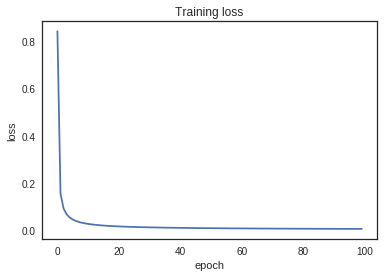

In [ ]:
plot(losses)
title('Training loss')
xlabel('epoch')
ylabel('loss')

## 4. Plot the decision boundary

Here we predict on the traning points and on a fixed grid so that we can use contour to display the decision boundary. 

In [ ]:
def plot_decision_boundary(X, y, w, b):
    x1 = np.linspace(X[:,0].min(), X[:, 0].max(), 200)
    x2 = np.linspace(X[:,1].min(), X[:, 1].max(), 200)
    X1, X2 = np.meshgrid(x1, x2)
    pts = np.c_[X1.ravel(), X2.ravel()]
    f = predict(pts, w, b).reshape(X1.shape)
    figure(figsize=(7,7))
    scatter(X[:,0], X[:,1], c=y, cmap=cm.Accent, s=30)
    contour(X1, X2, f, 1, levels=[0.5], cmap=cm.gray)
    xlabel('$x_1$')
    ylabel('$x_2$')
    title('Decision boundary')
    

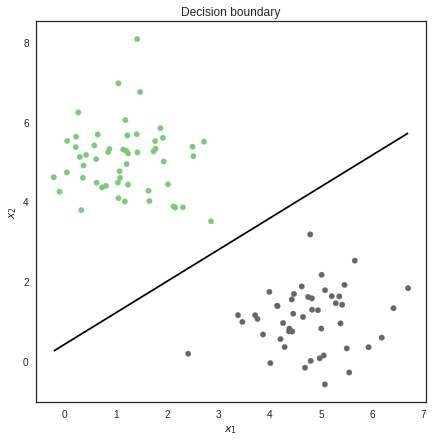

In [ ]:
plot_decision_boundary(X, y, w, b)

In [ ]:
print('Estimated parameters,  w =', w, ' b =', b)

Estimated parameters,  w = [ 1.75097917 -2.21218184]  b = 0.9281972510380795


These are very similar to the parameters estimated by full gradient descent, which were:

``
w = [ 1.75098391 -2.20772945]  b = 0.9265792816088788
``

## Exercises

- Try changing the batch size. What is the effect?
- Try changing the data so that it is not linearly separable (increase the in class variance) and running logistic regression with SGD on the result.